In [1]:
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import time_series.analysis as san
import time_series.data_frames as df

In [2]:
msft_ticker = yf.Ticker("MSFT")
msft_data = msft_ticker.history(interval="1d", period="1y")
msft_data.index = msft_data.index.tz_localize(None)
msft_analyser = san.TimeSeriesAnalyser(msft_data)

## Исходный временной ряд

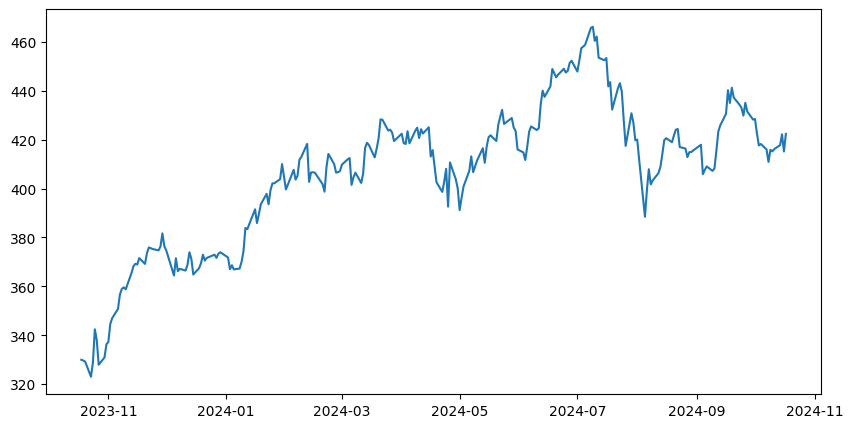

In [3]:
df.write_excel(msft_data, path="Results.xlsx")
(dates, prices) = df.get_arrays(msft_data, col="Open")
fig = plt.figure(figsize=(10, 5))
plt.plot(dates, prices)

## Скользящее среднее

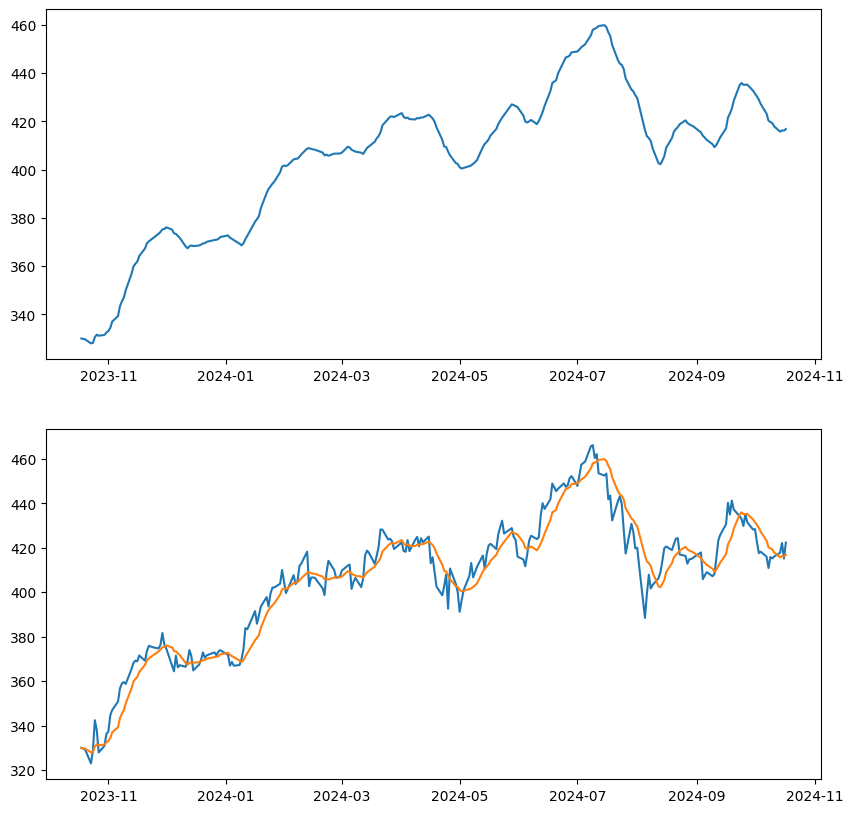

In [4]:
msft_movavg = msft_analyser.calc_movavg(datetime.timedelta(10))
df.write_excel(msft_movavg, path="Results.xlsx")
(dates1, prices1) = df.get_arrays(msft_data, col="Open")
(dates2, prices2) = df.get_arrays(msft_movavg, col="Moving avg")
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.plot(dates2, prices2)
fig.add_subplot(2, 1, 2)
plt.plot(dates1, prices1)
plt.plot(dates2, prices2)

In [5]:
msft_analyser = san.TimeSeriesAnalyser(msft_movavg, interval=msft_analyser.interval)

## Экстремумы скользящего среднего

In [6]:
msft_extremes = msft_analyser.find_extremes(col="Moving avg")
df.write_excel(msft_extremes, path="Results.xlsx")
msft_extremes

,Extreme
Date,
2023-10-23,327.995548
2024-07-15,459.883954


## Дифференциал скользящего среднего

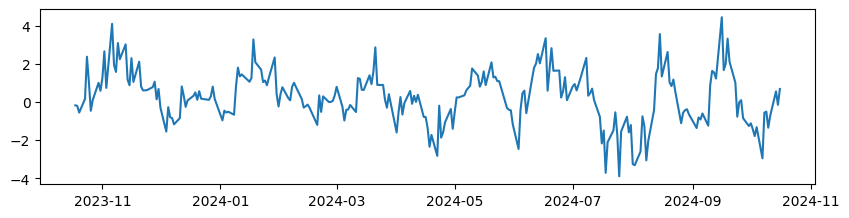

In [7]:
msft_diff = msft_analyser.differentiate(col="Moving avg")
df.write_excel(msft_diff, path="Results.xlsx")
(dates, prices) = df.get_arrays(msft_diff, col="Diff")
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(2, 1, 1)
plt.plot(dates, prices)

## Авкорреляция скользящего среднего

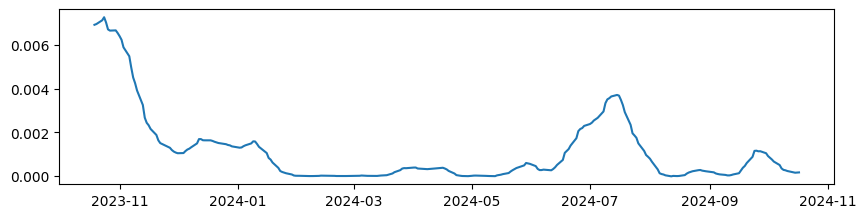

In [8]:
msft_autocor = msft_analyser.calc_autocor(col="Moving avg")
df.write_excel(msft_autocor, path="Results.xlsx")
(dates, prices) = df.get_arrays(msft_autocor, col="Autocor")
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(2, 1, 1)
plt.plot(dates, prices)